In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Test = pd.read_csv('E:/DS/Omneky/test_data.csv')
Train = pd.read_csv('E:/DS/Omneky/training_data.csv')

In [3]:
Train

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
0,0,WBC,579.00,10^3/μl,2019-07-02 01:19:03.581,10.0,4.0,old,male
1,1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male
2,2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male
3,3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male
4,4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male
...,...,...,...,...,...,...,...,...,...
9995,9995,WBC,9.14,10^3/μl,2019-09-06 16:07:32.846153+00:00,10.0,4.0,adult,male
9996,9996,WBC,4.90,thou/mm3,2019-11-25 11:53:17.630406+00:00,10.0,4.0,adult,male
9997,9997,T4,9.80,μg/dl,2019-09-16 13:21:24.372339+00:00,12.0,4.5,old,male
9998,9998,WBC,4.93,10^3/μl,2019-09-16 13:21:24.372339+00:00,10.0,4.0,old,male


In [4]:
Train.drop(columns=['created_at'],inplace=True)
Test.drop(columns=['created_at'],inplace=True)

In [5]:
Train['standard_lab_parameter_name'] = Train['standard_lab_parameter_name'].astype('category')
Train['standard_lab_parameter_name'] = Train['standard_lab_parameter_name'].cat.codes
Train['standard_lab_parameter_name']
Test['standard_lab_parameter_name'] = Test['standard_lab_parameter_name'].astype('category')
Test['standard_lab_parameter_name'] = Test['standard_lab_parameter_name'].cat.codes
Test['standard_lab_parameter_name']

0       4
1       3
2       3
3       4
4       4
       ..
9995    1
9996    2
9997    0
9998    4
9999    1
Name: standard_lab_parameter_name, Length: 10000, dtype: int8

In [6]:
Train['age_group'] = Train['age_group'].astype('category')
Train['age_group'] = Train['age_group'].cat.codes
Train['age_group']
Test['age_group'] = Test['age_group'].astype('category')
Test['age_group'] = Test['age_group'].cat.codes
Test['age_group']

0       0
1       0
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: age_group, Length: 10000, dtype: int8

In [7]:
Train['gender'] = Train['gender'].astype('category')
Train['gender'] = Train['gender'].cat.codes
Train['gender']

0       3
1       3
2       3
3       3
4       3
       ..
9995    3
9996    3
9997    3
9998    3
9999    3
Name: gender, Length: 10000, dtype: int8

In [8]:
Train['unit'] = Train['unit'].astype('category')
Train['unit'] = Train['unit'].cat.codes
Train['unit']
Test['unit'] = Test['unit'].astype('category')
Test['unit'] = Test['unit'].cat.codes
Test['unit']

0        5
1       20
2       20
3        5
4        0
        ..
9995    18
9996    12
9997    12
9998     4
9999    18
Name: unit, Length: 10000, dtype: int8

In [9]:
Train.info()
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   10000 non-null  int64  
 1   standard_lab_parameter_name  10000 non-null  int8   
 2   parameter_value              10000 non-null  float64
 3   unit                         10000 non-null  int8   
 4   reference_high               10000 non-null  float64
 5   reference_low                10000 non-null  float64
 6   age_group                    10000 non-null  int8   
 7   gender                       10000 non-null  int8   
dtypes: float64(3), int64(1), int8(4)
memory usage: 351.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id              

<AxesSubplot:>

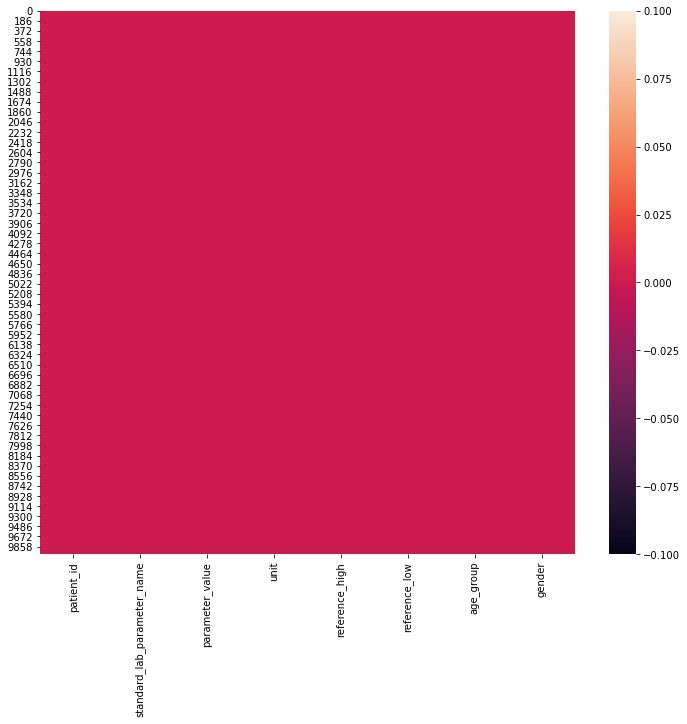

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(Train.isnull())

<AxesSubplot:>

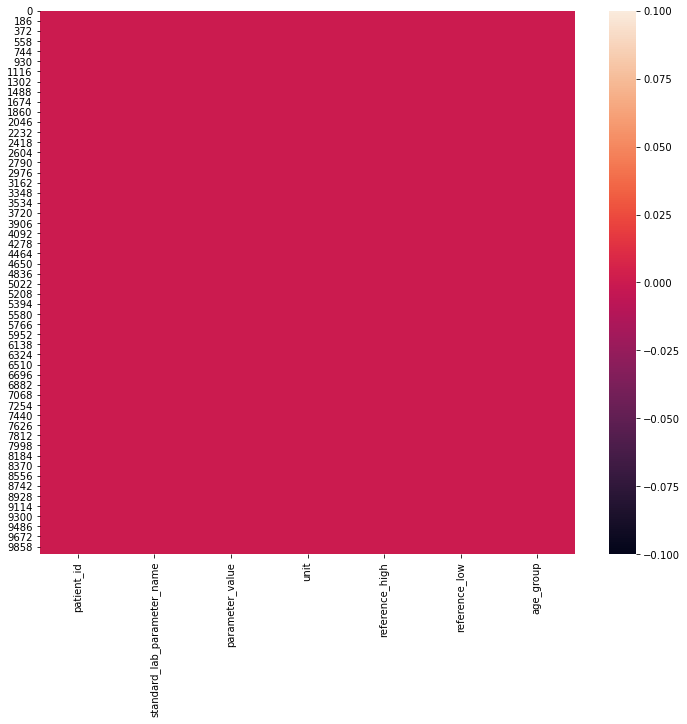

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(Test.isnull())

<AxesSubplot:>

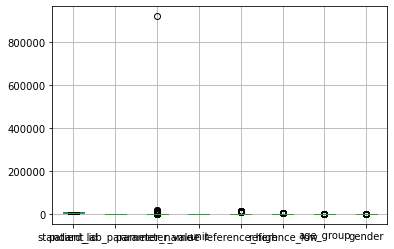

In [12]:
Train.boxplot()

<AxesSubplot:>

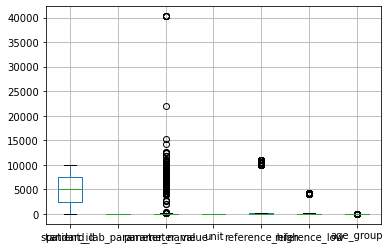

In [13]:
Test.boxplot()

In [14]:
X = Train.iloc[:,:7]
y = Train.gender

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [17]:
classification.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = classification.predict(X_test)

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       223
           3       0.89      1.00      0.94      1777

    accuracy                           0.89      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.79      0.89      0.84      2000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8885

In [21]:
numpy_array=classification.predict(Test)

In [22]:
numpy_array

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

In [23]:
df1 = pd.DataFrame(numpy_array)

In [24]:
df = pd.concat([Test,df1], axis=1)
df

,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group,0
0,0,4,8.10,5,10.0,4.0,0,3
1,1,3,13.00,20,12.0,4.5,0,3
2,2,3,7.10,20,12.0,4.5,0,3
3,3,4,5.62,5,10.0,4.0,0,3
4,4,4,9350.00,0,10000.0,4000.0,2,3
...,...,...,...,...,...,...,...,...
9995,9995,1,14.00,18,55.0,0.0,0,3
9996,9996,2,135.00,12,145.0,135.0,0,3
9997,9997,0,102.00,12,108.0,98.0,0,3
9998,9998,4,6.00,4,10.0,4.0,0,3
